# **Using a machine learning model to predict heart disease**

This machine learning model deals with predicting whether a patient has a heart disease or not based on their medical records.
The model is built using various Python ML and DS modules.

One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### **Approach used in the following problem:**

1. Definition of the problem
2. Exploring the data with us
3. Definition of evaluation metric (i.e., what defines success of the model)
4. Features in data that we'd be focussing on
5. Modelling
6. Experimentation


### 1. **Definition of the problem**


To summarise the problem in a statement,
> Given clinical parameters about a patient, we are to create a model to predict whether or not they have heart disease.


### 2. **Exploring the data with us**

This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. 


### 3. **Definition of evaluation metric**

Reaching 90% accuracy at predicting whether or not someone has heart disease during proof of concept.


### 4. **Features**

1. id (Unique id for each patient)
2. age (Age of the patient in years)
3. origin (place of study)
4. sex (Male/Female)
5. cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
6. trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
7. chol (serum cholesterol in mg/dl)
8. fbs (if fasting blood sugar > 120 mg/dl)
9.  (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]
10. thalach: maximum heart rate achieved
11. exang: exercise-induced angina (True/ False)
12. oldpeak: ST depression induced by exercise relative to rest
13. slope: the slope of the peak exercise ST segment
14. ca: number of major vessels (0-3) colored by fluoroscopy
15. thal: [normal; fixed defect; reversible defect]
16. target: the predicted attribute

## **Preparing relevant tools**

These include the following libraries/modules:

1. NumPy
2. Matplotlib
3. pandas
4. Scikit-Learn

In [70]:
# Data analysis and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# To enable Matplotlib plots to appear within the notebook
%matplotlib inline

## **Loading our data**

In [71]:
url = "https://raw.githubusercontent.com/thehyena24/ML-Projects/main/heart-disease-classification-project/heart-disease.csv"
df = pd.read_csv(url)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## **Data exploration (Exploratory Data Analysis)**

Involves analysing the data to become a subject matter expert on the data being dealt with.

1. The question(s) we are trying to solve.
2. The kind of data with us, and handling of different types.
3. Dealing with missing data.
4. Dealing with outliers in the data.
5. Adding, changing or removing features from the data based on requirement.

In [72]:
# target variable is what we want to predict using our model. We will look at statistics related to the target variable first.

df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

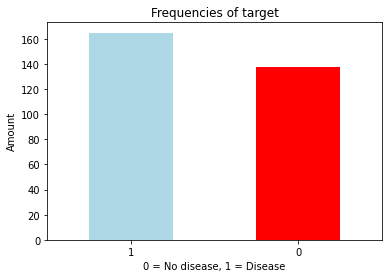

In [73]:
# Visualising target using a plot (shows visually that we have somewhat  balanced data, i.e. similar numbers of 0s and 1s)

df["target"].value_counts().plot(kind = "bar", color = ["lightblue", "red"]);

plt.title("Frequencies of target")
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("Amount")
plt.xticks(rotation = 0);

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [75]:
# Checking if there are any missing values

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [76]:
# Checking out some statistics regarding our data

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## **Finding patterns in our data**

This is done by comparing different columns to see if there's any trend. It is done based on intuition and there's no particular order for doing it.

## **Heart disease frequency by sex**

In [77]:
# Check number of males and females

df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [78]:
# Compare target column with sex column
# Note: df.target is the same as df["target"]
# Note: Based on the dataset we have (see crosstab results), we can roughly say that women have roughly 75% chance of getting heart disease. It isaround 45% for men. 

pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


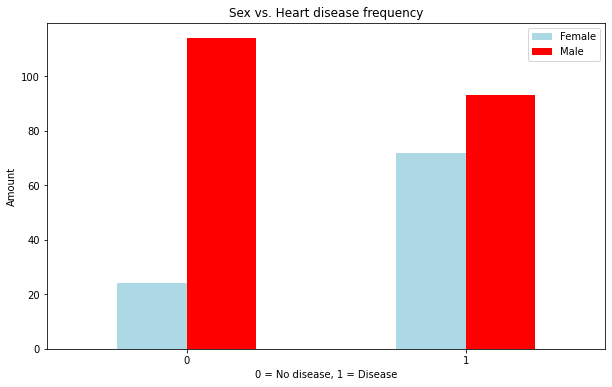

In [79]:
# Creating a plot of the crosstab data of target and sex.
# Note: 

ts = pd.crosstab(df.target, df.sex)

ts.plot(kind = "bar",
       figsize = (10, 6),
       color = ["lightblue", "red"]);

plt.title("Sex vs. Heart disease frequency")
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation = 0);    # The values under x axis are originally rotated. This is to make them upright.

## **Age vs. Maximum heart rate for heart disease**

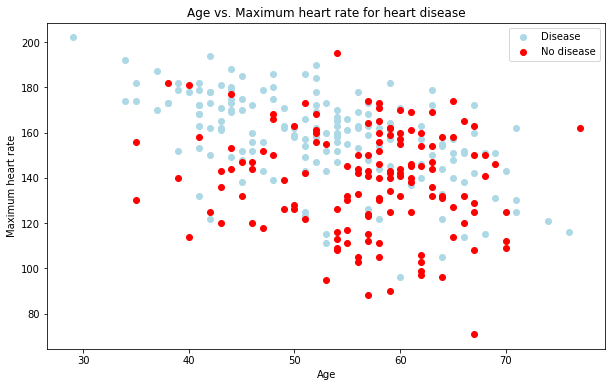

In [80]:
# Note: We are using a scatter plot here as there's too much data to fit in a bar graph

plt.figure(figsize = (10, 6))

# Scatter plot that considers only people with heart disease

plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            c = "lightblue");

# Scatter plot that considers only people without heart disease

plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            c = "red");

plt.title("Age vs. Maximum heart rate for heart disease")
plt.xlabel("Age")
plt.ylabel("Maximum heart rate")
plt.legend(["Disease", "No disease"]);

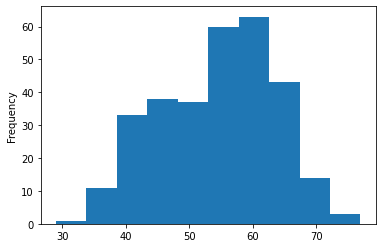

In [81]:
# Distribution of age column using a histogram
# Note: The histogram is left-skewed, i.e., more number of older people in our dataset

agePlot = df.age
agePlot.plot.hist();

## **Heart disease frequency vs. Chest pain type**

cp - Chest pain type 
- 0 : Typical angina - Chest pain due to decreased blood supply to heart
- 1 : Atypical angina - Chest pain not related to the heart
- 2 : Non-anginal - Esophageal spasms (not related to the heart)
- 3 : Asymptomatic - Chest pain without signs of disease

In [82]:
# Compare target column with cp column
# Note: Based on the dataset we have (see crosstab results), we can roughly say that, chest pain varies somewhat directly proportionally WRT heart disease
# Do note that some patterns might look somewhat off. For example, here, there is a greater heart disease frequency in people with non-aginal chest pain.

pd.crosstab(df.target, df.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


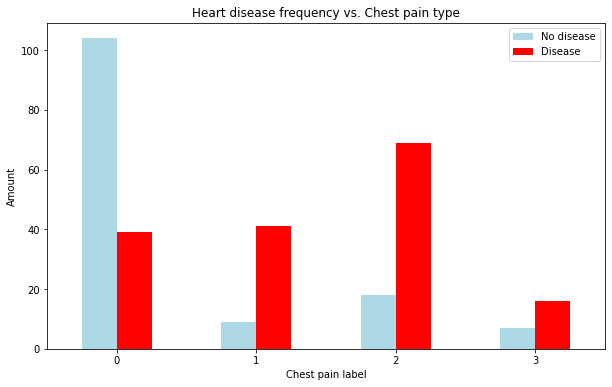

In [83]:
# Visualising the above data

cpPlot = pd.crosstab(df.cp, df.target)

cpPlot.plot(kind = "bar",
            figsize = (10, 6),
            color = ["lightblue", "red"]);

plt.title("Heart disease frequency vs. Chest pain type")
plt.xlabel("Chest pain label")
plt.ylabel("Amount")
plt.legend(["No disease", "Disease"])
plt.xticks(rotation = 0);

## **Making a correlation matrix**

It basically maps the correlation between any two variables in our data frame.
- A higher positive value means a potential positive correlation.
- A higher negative value means a potential negative correlation.

For example, in our current matrix, the cells corresponding to cp and target have a positive value. What this means is that, as cp goes up, the target value also increases.

Similarly, the cells corresponding to exang and target have a negative value. So as exang goes up, target must come down.

In [84]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


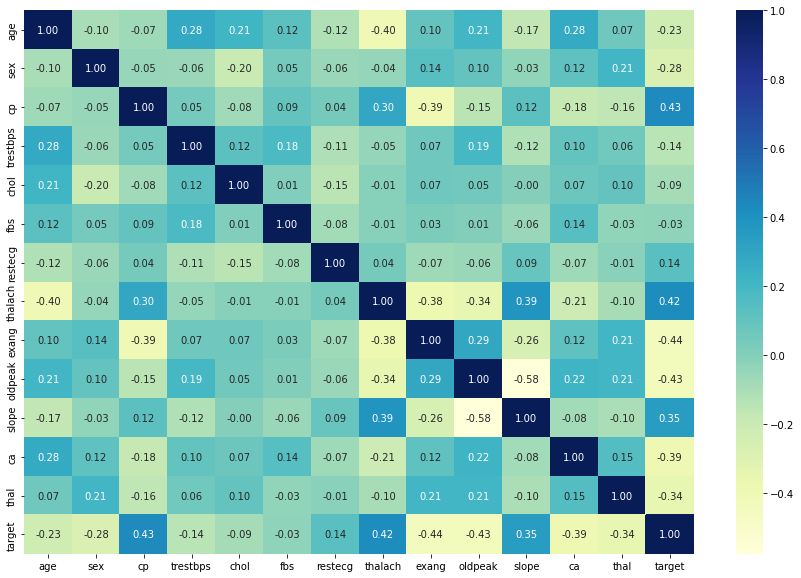

In [85]:
# Visualising our correlation matrix

corr_matrix = df.corr()

fig, ax = plt.subplots(figsize = (15, 10))

ax = sns.heatmap(corr_matrix,
                 annot = True,
                 fmt = ".2f",
                 cmap = "YlGnBu");

## **Modelling**

In [86]:
'''
Split data into X and Y
X - The entire data set excluding the target variable. It is to be processed by the ML model to try and figure out a way to get the target variable.
Y - Only consists of the target variable. The ML model should find a way to arrive at Y using X.
'''

X = df.drop("target", axis = 1)
Y = df.target

In [87]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [88]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [89]:
# Now, we further split these into training and test sets.

np.random.seed(42)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,               
                                                    test_size = 0.2)    # This means that 20% of the data will be used as the test set

In [90]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [91]:
Y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

Now, we build the ML model.

The model will be trained on the training set (i.e., the model will learn patterns by analysing this data).

The model will then be tested on the test set (i.e., the patterns learnt will be tested).

We will be trying three different ML models:
1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

Note: The models were selected after analysing the following resource: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

Note: Logistic Regression, despite its name, is a linear model for classification, rather than regression.

In [92]:
# To avoid repetition of code, we will create a dictionary containing models, and then create a function to fit and score the models.

# Dictionary of models

models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}


# Function to fit and score models

def FitAndScore(models, X_train, Y_train, X_test, Y_test):
    np.random.seed(42)           #To make the results reproducable

    modelScores = {}             # Create dictionary to keep track of model scores

    for name, model in models.items():        # Loops through models
        model.fit(X_train, Y_train)           # Trains each model using the training data
        modelScores[name] = model.score(X_test, Y_test)         # Evaluates each trained model and appends their scores to the modelScores dictionary
    
    return modelScores

In [93]:
modelScores = FitAndScore(models, X_train, Y_train, X_test, Y_test)
modelScores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## **Model comparision**

We will compare the scores of each model visually and determine which model is best suited for our current problem.

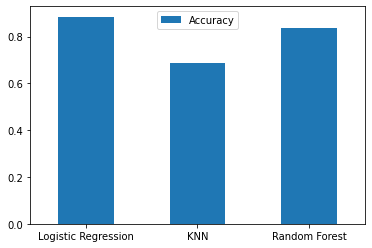

In [94]:
compareModels = pd.DataFrame(modelScores, index = ["Accuracy"])
compareModels.T.plot.bar()      # .T -> Transpose
plt.xticks(rotation = 0);

Clearly, Logistic Regression is the mest model for the current problem. Now, we can focus on tuning its performance to try and take its accuracy from 88.5% to close to 95% (our original proof of thought).

We will look at the following:
- Hyperparameter tuning
- Feature importance
- Confusion matrix
- Cross validation
- Precision
- Recall
- F1 SCORE
- Classification report
- ROC curve
- Area under the curve (AUC)

## **Hyperparameter tuning**

Hyperparameters are basically settings in the model that we can vary in order to get some result.

## **Experimenting with the worst-performing model (KNN)**

In [95]:
# First, we'll experiment with the hyperparameters of the worst-performing model

trainScores = []
testScores = []

neighbors = range(1, 21)

# Create a list of different values for n_neighbors hyperparameter to try different values for it in a loop.
knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)     # Set n_neighbors hyperparameter to a value between 1 and 21
    knn.fit(X_train, Y_train)       # Train the model every time you change the hyperparameter n_neighbors

    trainScores.append(knn.score(X_train, Y_train))     # Make a list of scores of the model for different values of the hyperparameter on training data
    testScores.append(knn.score(X_test, Y_test))        # Make a list of scores of the model for different values of the hyperparameter on test data

In [96]:
trainScores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [97]:
testScores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum accuracy of KNN on test data:  75.40983606557377 %


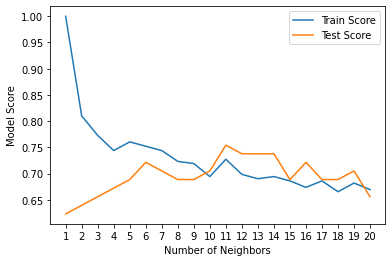

In [98]:
plt.plot(neighbors, trainScores, label = "Train Score")
plt.plot(neighbors, testScores, label = "Test Score")

plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.xticks(np.arange(1, 21, 1))
plt.legend()
print("Maximum accuracy of KNN on test data: ", (max(testScores) * 100), "%")

Clearly, KNN works best with hyperparameter n_neighbors set to 11. Its efficiency goes from 69% to 75%. But that still isn't better than the other two models. So we can safely ignore KNN.

# **Hyperparameter tuning with RandomizedSearchCV()**

We'll be doing the same hyperparameter tuning for both LogisticRegression() and RandomForestClassifier(). But instead of diong it manually as in KNN, we will do it using RandomizedSearchCV().

CV stands for cross-validation. Instead of doing a normal train-test split, it uses the same data and creates n (n = 5 by default in sklearn) different train-test split sets and evaluates the model on each of them, varying the hyperparameters in the process. 

It'll automate the process of playing around with the hyperparameters to get maximum effeciency.

In [99]:
# Create a hyperparameter grid for LogisticRegression()
# Note: We use continuous distributions given by np.logspace() and np.arange() as it is highly recommended to use continuous distributions for continuous parameters

logRegGrid = {"C": np.logspace(-4, 4, 20),          # C and solver are hyperparameters of LogisticRegression
              "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier()

randForClaGrid = {"n_estimators": np.arange(10, 1000, 50),         # np.arange(10, 1000, 50) just creates an array of numbers between 10 and 1000, step = 50
                  "max_depth": [None, 3, 5, 10],
                  "min_samples_split": np.arange(2, 20, 2),
                  "min_samples_leaf": np.arange(1, 20, 2)}

Using these hyperparameter grids, we will now tune our models using RandomizedSearchCV().

In [100]:
# Tuning LogisticRegression()

np.random.seed(42)

# Set up random hyperparameter search for LogisticRegression()

rsLogReg = RandomizedSearchCV(LogisticRegression(),
                              param_distributions = logRegGrid,
                              cv = 5,           # Implies 5-fold cross validation
                              n_iter = 20,      # Implies 20 iterations
                              verbose = True)       # RandomizedSearchCV() will cross-validate LogisticRegression 5 times, for 20 iterations. So we will have 20 x 5 = 100 fits.


# Fit random hyperparameter search model for LogisticRegression()

rsLogReg.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [101]:
# Find the best parameters to use with LogisticRegression()

rsLogReg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [102]:
rsLogReg.score(X_test, Y_test)

0.8852459016393442

The efficiency of LogisticRegression() has remained more or less the same, even after tuning its hyperparameters.

Now, we'll try to tune RandomForestClassifier()

In [104]:
# Tuning RandomForestClassifier()

np.random.seed(42)

# Set up random hyperparameter search for RandomForestClassifier()

rsRandForCla = RandomizedSearchCV(RandomForestClassifier(),
                                  param_distributions = randForClaGrid,
                                  cv = 5,
                                  n_iter = 20,
                                  verbose = True)

# Fit random hyperparameter search model for RandomForestClassifier()

rsRandForCla.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [105]:
# Find the best parameters to use with RandomForestClassifier()

rsRandForCla.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [106]:
rsRandForCla.score(X_test, Y_test)

0.8688524590163934

We see an improvement of around 3-4% in RandomForestClassifier(). 

Even so, LogisticRegression() still outperforms RandomForestClassifier().

So, now we might want to further try to improve LogisticRegression().

We will now try using GridSearchCV(), which performs an exhaustive search overspecified parameter values for an estimator.

## **Hyperparameter tuning using GridSearchCV()**

Since LogissticRegression() is giving us the best results so far, we will try to improve its score using GridSearchCV()

In [107]:
# Create a hyperparameter grid for LogisticRegression()
# Note: We use continuous distributions given by np.logspace() and np.arange() as it is highly recommended to use continuous distributions for continuous parameters

logRegGrid = {"C": np.logspace(-4, 4, 30),          # C and solver are hyperparameters of LogisticRegression
              "solver": ["liblinear"]}

# Set up grid hyperparameter search for LogisticRegression()

gsLogReg = GridSearchCV(LogisticRegression(),
                        param_grid = logRegGrid,
                        cv = 5,
                        verbose = True)

# Fit grid hyperparameter search model

gsLogReg.fit(X_train, Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [108]:
# Check the best hyperparameters

gsLogReg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [109]:
gsLogReg.score(X_test, Y_test)

0.8852459016393442

Again, it's 88.5%. So LogisticRegression() actually does pretty well.

We'll keep it at 88.5% for now and evaluate the model.

## **Evaluating our tuned ML model, beyond accuracy**

We will create:

- ROC curve and AUC score
- Confusion Matrix
- Classification Report
- Precision
- Recall
- F1-Score

We will use cross-validation where possible.

Note: To make comparisions and evaluate our trained model, we will first make some predictions.

In [111]:
# Make some predictions with our tuned model

yPredictions = gsLogReg.predict(X_test)
yPredictions

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [113]:
# We can compare the above predictions to the actual test sample.

Y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

## **Building an ROC curve**

An ROC curve is created by plotting the true positive rate against the false positive rate.

Note: Confusion matrix anatomy

- True positive: Model predicts 1 when truth is 1
- False positive: Model predicts 1 when truth is 0
- True negative: Model predicts 0 when truth is 0
- False negative: Model predicts 0 when truth is 1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


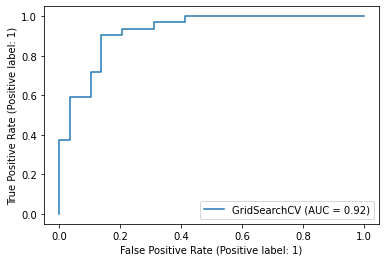

In [114]:
# Plot ROC curve and calculate the AUC(Area Under Curve) metric

plot_roc_curve(gsLogReg, X_test, Y_test);

Area under this curve is 0.92. A perfect model would achieve AUC = 1.0.

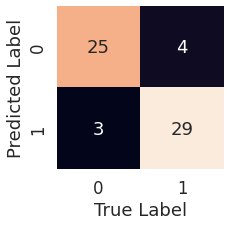

In [117]:
# Construct a confusion matrix

sns.set(font_scale = 1.5)

# Plots a confusion matrix using Seaborn's heatmap()

def PlotConfusionMatrix(Y_test, yPredictions):
    fig, ax = plt.subplots(figsize = (3, 3))
    ax = sns.heatmap(confusion_matrix(Y_test, yPredictions),
                     annot = True,
                     cbar = False)
    
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")


PlotConfusionMatrix(Y_test, yPredictions);

Now, we will get a classification report, as well as cross-validation precision, recall and f1-score.

In [118]:
# Classification report using only test split.

print(classification_report(Y_test, yPredictions))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## **Classification evaluation metrics using cross-validation**

We will calculate accuracy, precision, recall score and f1-score of our model using cross-validation, and to do so, we'll be using cross_val_score().

In [119]:
# Check best hyperparameters

gsLogReg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [120]:
# Create a new classifier using best parameters

clf = LogisticRegression(C = 0.20433597178569418,
                         solver = "liblinear")

In [123]:
# Cross-validated accuracy

cvAccuracy = cross_val_score(clf,
                             X,
                             Y,
                             cv = 5,
                             scoring = "accuracy")

# cvAccuracy has the accuracies of 5 different cross-validation splits. We can find its average.

cvAccuracy = np.mean(cvAccuracy)
cvAccuracy

0.8446994535519124

In [124]:
# Cross-validated accuracy

cvPrecision = cross_val_score(clf,
                             X,
                             Y,
                             cv = 5,
                             scoring = "precision")

# cvAccuracy has the precisions of 5 different cross-validation splits. We can find its average.

cvPrecision = np.mean(cvPrecision)
cvPrecision

0.8207936507936507

In [125]:
# Cross-validated recall

cvRecall = cross_val_score(clf,
                             X,
                             Y,
                             cv = 5,
                             scoring = "recall")

# cvAccuracy has the recalls of 5 different cross-validation splits. We can find its average.

cvRecall = np.mean(cvRecall)
cvRecall

0.9212121212121213

In [126]:
# Cross-validated f1

cvF1 = cross_val_score(clf,
                             X,
                             Y,
                             cv = 5,
                             scoring = "f1")

# cvAccuracy has the f1s of 5 different cross-validation splits. We can find its average.

cvF1 = np.mean(cvF1)
cvF1

0.8673007976269721

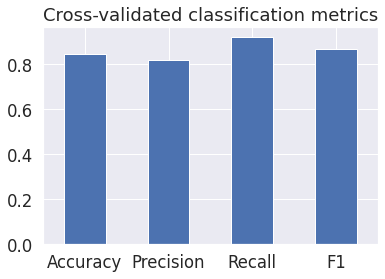

In [129]:
# Visualize our cross-validated metrics

cvMetrics = pd.DataFrame({"Accuracy": cvAccuracy,
                          "Precision": cvPrecision,
                          "Recall": cvRecall,
                          "F1": cvF1,},
                         index = [0])

cvMetrics.T.plot.bar(title = "Cross-validated classification metrics",
                     legend = False)

plt.xticks(rotation = 0);